In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipdb import set_trace
plt.rcParams.update({'font.size': 16})


In [8]:
results_dir = "build2/results_medium/fisheye_"
# results_dir = "build2/results_wide/fisheye_"

solver_names = ["p4pfr", "p4pfr_LM", "hc_depth_random", 
                "hc_depth_p4pfr","hc_depth_p4pfr_LM","hc_depth_gtDebug",
                "p35pf","p35pf_LM", "hc_depth_p35pf"]
solver_names_legend = ["p4pfr", "p4pfr_LM", "hc_depth_random", 
                "p4pfr_hc_depth","p4pfr_hc_depth_LM","hc_depth_gtDebug",
                "p3.5pf","p3.5pf_LM", "p3.5pf_hc_depth"]
solver_colors = ['skyblue', 'lightcoral', 'lightgreen', 'purple', 'orange', 'brown','lightgreen', 'brown', 'orange']
curve_styles = ['-', '--', '-.', ':', '-', '--', '-', '--', '-']
line_widths = [4, 2, 4, 2, 2, 2, 4, 2, 4]
present_IDs = [0, 1, 3, 6, 7, 8]
solver_names = [solver_names[i] for i in present_IDs]
solver_colors = [solver_colors[i] for i in present_IDs]
solver_names_legend = [solver_names_legend[i] for i in present_IDs]

In [9]:
R_errors_all = {}
t_errors_all = {}
f_errors_all = {}

for solver_id in range(len(solver_names)):
    file_path_text = results_dir + solver_names[solver_id] + ".txt"
    R_errors = []
    t_errors = []
    f_errors = []

    with open(file_path_text, 'r') as file:
        for line_num, line in enumerate(file, 1):
            # line will include the newline character '\n' at the end
            # Use .strip() to remove leading/trailing whitespace, including '\n'
            cleaned_line = line.strip()

            Errors = cleaned_line.split(" ")
            if len(Errors) == 1:
                continue

            nSols = (len(Errors) - 1) // 3
            best_R_error = float('inf')
            best_t_error = float('inf')
            best_f_error = float('inf')

            for i in range(nSols):
                
                R_error_temp = float(Errors[i*3])
                t_error_temp = float(Errors[i*3+1])
                f_error_temp = float(Errors[i*3+2])

                if R_error_temp < best_R_error:
                    best_R_error = R_error_temp
                    best_t_error = t_error_temp
                    best_f_error = f_error_temp

            R_errors.append(best_R_error)
            t_errors.append(best_t_error)
            f_errors.append(best_f_error)

    R_errors_all[solver_names[solver_id]] = np.log10(R_errors)
    t_errors_all[solver_names[solver_id]] = np.log10(t_errors)
    f_errors_all[solver_names[solver_id]] = np.log10(f_errors)

                

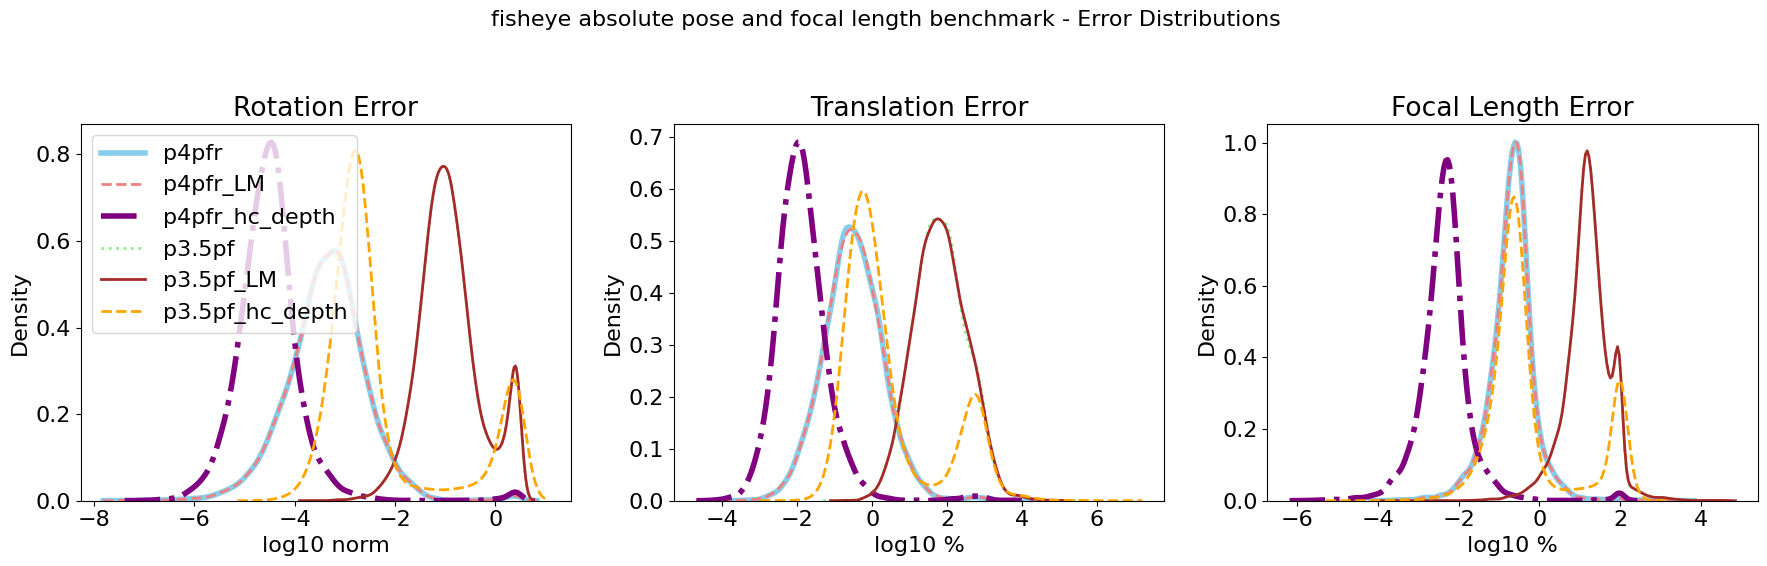

In [10]:
plot_title_prefix = "fisheye absolute pose and focal length benchmark"

# --- Plotting Distributions (Histograms / KDEs) ---
plt.figure(figsize=(18, 6))
plt.suptitle(f"{plot_title_prefix} - Error Distributions", fontsize=16)

# RError
plt.subplot(1, 3, 1)
for error_id in range(len(R_errors_all)):
    sns.kdeplot(data=R_errors_all[solver_names[error_id]], color=solver_colors[error_id], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
plt.title('Rotation Error')
plt.xlabel('log10 norm')
plt.ylabel('Density')
plt.legend(solver_names_legend)

# tError
plt.subplot(1, 3, 2)
for error_id in range(len(t_errors_all)):
    sns.kdeplot(data=t_errors_all[solver_names[error_id]], color=solver_colors[error_id], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
plt.title('Translation Error')
plt.xlabel('log10 %')
plt.ylabel('Density')

# fError
plt.subplot(1, 3, 3)
for error_id in range(len(f_errors_all)):
    sns.kdeplot(data=f_errors_all[solver_names[error_id]], color=solver_colors[error_id], linewidth=line_widths[error_id], linestyle=curve_styles[error_id])
plt.title('Focal Length Error')
plt.xlabel('log10 %')
plt.ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()